In [12]:
import warnings
warnings.filterwarnings("ignore")

from os.path import exists
from pathlib import Path
import pickle5 as pickle
from dateutil.relativedelta import relativedelta
import datetime as dt

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
sm, med, lg = 10, 15, 20
plt.rc("font", size=sm)                     # controls default text sizes
plt.rc("axes", titlesize=med)               # fontsize of the axes title
plt.rc("axes", labelsize=med)               # fontsize of the x & y labels
plt.rc("xtick", labelsize=sm)               # fontsize of the tick labels
plt.rc("ytick", labelsize=sm)               # fontsize of the tick labels
plt.rc("legend", fontsize=sm)               # legend fontsize
plt.rc("figure", titlesize=lg)              # fontsize of the figure title
plt.rc("axes", linewidth=2)                 # linewidth of plot lines
plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.dpi"] = 134

In [13]:
import datetime as dt
import pandas as pd
from os.path import exists
from ust import save_xml, read_rates, available_years




class Clean(object):
    
    
    def __init__(self, day1):
        self.day1 = str(day1)[:10]
        self.now = str(dt.datetime.now())[:10]
    
    
    def clean_prep(self):
        """
            - save UST yield rates to local folder for selected years
        """
        for year in available_years():
            save_xml(year, folder="/home/gdp/hot_box/i4m/data/xml", overwrite=True)    
            
            
    def clean_main(self):
        """
            - run later - force update last year (overwrites existing file)
            - read UST yield rates as pandas dataframe
            - save as single CSV file
        """
        if exists("/home/gdp/hot_box/i4m/data/xml/rates.csv"):
            data = pd.read_csv("/home/gdp/hot_box/i4m/data/xml/rates.csv", parse_dates=["date"]).set_index("date")
            

            if pd.to_datetime(self.day1) in list(data.index):
                data = data[data.index == self.day1]                
                return (data['BC_10YEAR'].iloc[-1] / 100), str(data.index[-1])[:10]
            
            else:
                save_xml(2023, folder="/home/gdp/hot_box/i4m/data/xml", overwrite=True)
                df = read_rates(start_year=2022, end_year=2023, folder="/home/gdp/hot_box/i4m/data/xml")            
                df.to_csv("/home/gdp/hot_box/i4m/data/xml/rates.csv")
                df = pd.read_csv("/home/gdp/hot_box/i4m/data/xml/rates.csv", parse_dates=["date"]).set_index("date")
                df = df[df.index == self.day1]
                return (df['BC_10YEAR'].iloc[-1] / 100), str(df.index[-1])[:10]
            
        else:
            save_xml(2023, folder="/home/gdp/hot_box/i4m/data/xml", overwrite=True)
            df = read_rates(start_year=2022, end_year=2023, folder="/home/gdp/hot_box/i4m/data/xml")            
            df.to_csv("/home/gdp/hot_box/i4m/data/xml/rates.csv")
            df = df[df.index == self.day1]
            return (df['BC_10YEAR'].iloc[-1] / 100), str(df.index[-1])[:10]

In [19]:
df = read_rates(start_year=1990, end_year=2023, folder="/home/gdp/hot_box/i4m/data/xml")  
display(df.tail())

,BC_1MONTH,BC_3MONTH,BC_6MONTH,BC_1YEAR,BC_2YEAR,BC_3YEAR,BC_5YEAR,BC_7YEAR,BC_10YEAR,BC_20YEAR,BC_30YEAR,BC_30YEARDISPLAY
date,,,,,,,,,,,,
2023-01-20,4.69,4.72,4.80,4.68,4.14,3.83,3.56,3.51,3.48,3.77,3.66,3.66
2023-01-23,4.69,4.73,4.82,4.70,4.21,3.88,3.61,3.56,3.52,3.80,3.69,3.69
2023-01-24,4.70,4.72,4.84,4.70,4.12,3.86,3.58,3.52,3.46,3.73,3.62,3.62
2023-01-25,4.67,4.72,4.79,4.67,4.11,3.84,3.54,3.51,3.46,3.74,3.62,3.62
2023-01-26,4.61,4.71,4.79,4.68,4.17,3.88,3.58,3.54,3.49,3.75,3.62,3.62


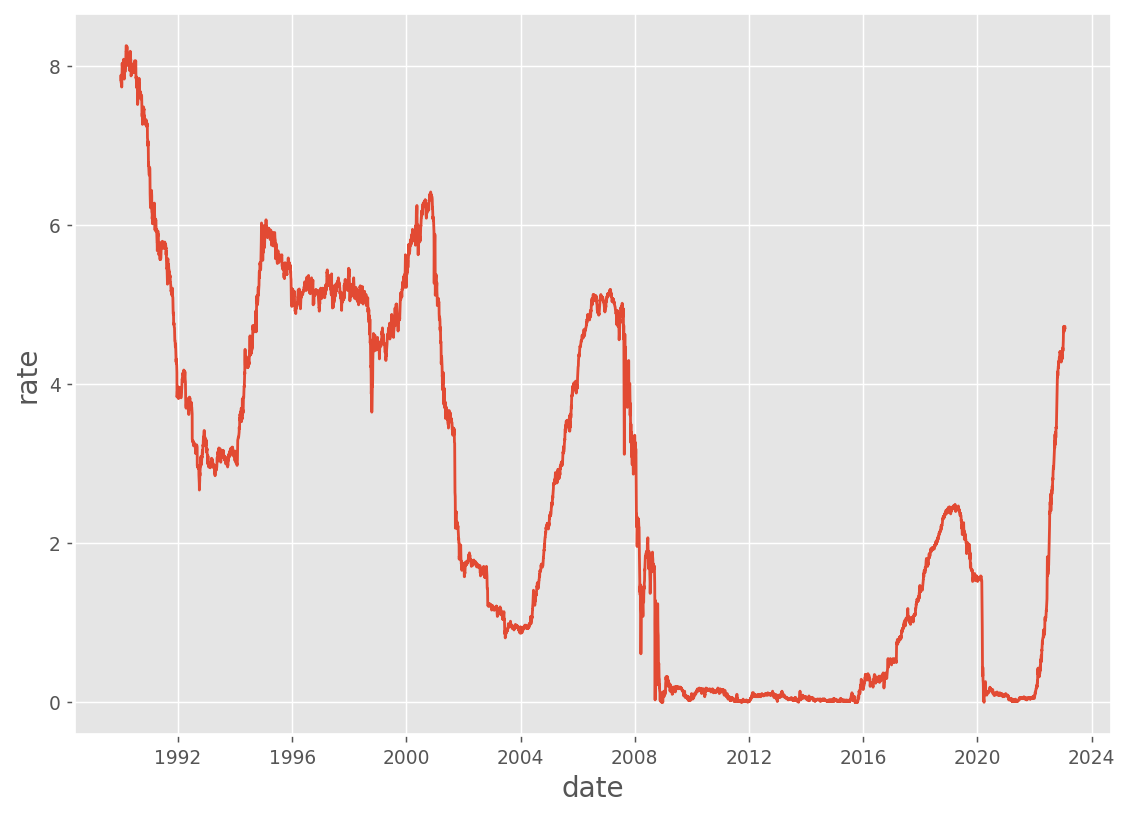

In [20]:
fig, ax = plt.subplots()
plt.plot(df['BC_3MONTH'])
plt.xlabel('date')
plt.ylabel('rate')
plt.show()

# rate from 01/2022 - 12/2022
    - 46.5x (4,650%)
    - 1yr

# 2004-2007
    - 4x (400%)


# 2016 - 2019
    - 26.5x (2,650%)


# 1999 - 2001
    - 73%

# 1994 - 1995
    - 100%



In [26]:
.1*(1+4650)


465.1

In [31]:
((6-3)/3)

1.0

In [27]:
4.75/.1

47.5